<a href="https://colab.research.google.com/github/takunton/ds/blob/main/work/ds_ml/web/lesson32_xgboost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd
import seaborn as sns

df = sns.load_dataset('titanic')
# df = df.dropna()
X = df.loc[:, (df.columns!='survived') & (df.columns!='alive')]
X = pd.get_dummies(X, drop_first=True)
y = df['survived']

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [4]:
from xgboost import XGBClassifier
model = XGBClassifier(early_stopping_rounds=10)

In [5]:
eval_set = [(X_test, y_test)]
model.fit(X_train, y_train, eval_set=eval_set, verbose=True)

[0]	validation_0-error:0.126866
[1]	validation_0-error:0.126866
[2]	validation_0-error:0.126866
[3]	validation_0-error:0.126866
[4]	validation_0-error:0.126866
[5]	validation_0-error:0.126866
[6]	validation_0-error:0.126866
[7]	validation_0-error:0.126866
[8]	validation_0-error:0.13806
[9]	validation_0-error:0.134328
[10]	validation_0-error:0.134328
[11]	validation_0-error:0.130597
[12]	validation_0-error:0.130597
[13]	validation_0-error:0.130597
[14]	validation_0-error:0.130597
[15]	validation_0-error:0.130597
[16]	validation_0-error:0.130597
[17]	validation_0-error:0.130597
[18]	validation_0-error:0.130597
[19]	validation_0-error:0.130597
[20]	validation_0-error:0.130597
[21]	validation_0-error:0.130597
[22]	validation_0-error:0.130597
[23]	validation_0-error:0.130597
[24]	validation_0-error:0.130597
[25]	validation_0-error:0.130597
[26]	validation_0-error:0.130597
[27]	validation_0-error:0.130597
[28]	validation_0-error:0.130597
[29]	validation_0-error:0.126866
[30]	validation_0-err

XGBClassifier(early_stopping_rounds=10)

In [6]:
from sklearn import metrics
y_pred = model.predict_proba(X_test)
metrics.log_loss(y_test, y_pred)

0.3362370888014505

<BarContainer object of 22 artists>

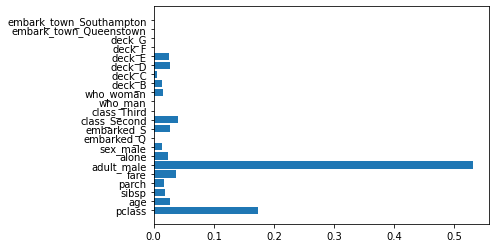

In [7]:
import matplotlib.pyplot as plt
model.feature_importances_
plt.barh(X.columns, model.feature_importances_)